In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Verifying the dynamics 

In [57]:
# The mass of the spacecraft is 600 kg

m_sc=600

# The moment of inertia of the spacecrfat including vscmg and wheel as point masses is 

Isx=100   # kg.m^2
Isy=100   # kg.m^2
Isz=135   # kg.m^2

Is=np.array([[Isx,0,0],[0,Isy,0],[0,0,Isz]])

# The moment of inertia of the gimbal taken in gimbal frame 

Ig1=0.036
Ig2=0.018
Ig3=0.006


# The moment of inertia of the wheel taken in wheel frame

Iq1=0.12
Iq2=0.03
Iq3=0.03

# The combined moment of inertia of vscmg and wheel taken in gimbal frame 

J1=0.156
J2=0.048
J3=0.036

J=np.array([[J1,0,0],[0,J2,0],[0,0,J3]])

In [58]:
# The initial angular velocity of spacecraft (components in body frame)

wx=0.007    #rad/s
wy=-0.012   #rad/s
wz=0.01     #rad/s

# The intial mrps of the spacecraft 

sigma1=0.7
sigma2=-0.3
sigma3=-0.8

In [59]:
# The normal wheel speed is 3000 rpm for each wheel 

Omega_1= (150*2*np.pi)/60    #rad/sec
Omega_2= Omega_1
Omega_3= Omega_1
Omega_4= Omega_1

# The initial gimbal angles are 

gamma_1=np.radians(45)         # vscmg1
gamma_2=np.radians(45)        # vscmg2
gamma_3=np.radians(45)       # vscmg3
gamma_4=np.radians(45)       # vscmg4

# The initial gimbal rates are 

gamma_dot_1=0                # vscmg1
gamma_dot_2=0                # vscmg2
gamma_dot_3=0                # vscmg3
gamma_dot_4=0                # vscmg4

# The mounting angle is 

theta=np.radians(54.75)


In [60]:
# Reference ( corresponding to gamma=0) 

# vscmg 1 

r_1=np.array([[0,1,0],[-np.sin(theta),0,-np.cos(theta)],[-np.cos(theta),0,np.sin(theta)]])

# vscmg 2 

r_2=np.array([[0,-np.sin(theta),-np.cos(theta)],[1,0,0], [0,-np.cos(theta),np.sin(theta)]])

# vscmg 3

r_3=np.array([[0,1,0],[-np.sin(theta),0,np.cos(theta)],[np.cos(theta),0,np.sin(theta)]])

# vscmg 4

r_4=np.array([[0, -np.sin(theta),np.cos(theta)],[1,0,0], [0, np.cos(theta),np.sin(theta)]])



In [61]:
# Direction cosine matrix that transforms from reference to current vscmg state 

def C(gamma):
    
    C=np.array([[np.cos(gamma),np.sin(gamma), 0],[-np.sin(gamma),np.cos(gamma),0],[0,0,1]])
    
    return C

In [62]:
# Initial orientation of vscmgs

# vscmg 1

g1_1=(C(gamma_1) @ r_1)[0,:].reshape(-1,1)
g2_1=(C(gamma_1) @ r_1)[1,:].reshape(-1,1)
g3_1=(C(gamma_1) @ r_1)[2,:].reshape(-1,1)


# vscmg 2

g1_2=(C(gamma_2) @ r_2)[0,:].reshape(-1,1)
g2_2=(C(gamma_2) @ r_2)[1,:].reshape(-1,1)
g3_2=(C(gamma_2) @ r_2)[2,:].reshape(-1,1)

# vscmg 3

g1_3=(C(gamma_3) @ r_3)[0,:].reshape(-1,1)
g2_3=(C(gamma_3) @ r_3)[1,:].reshape(-1,1)
g3_3=(C(gamma_3) @ r_3)[2,:].reshape(-1,1)

# vscmg 4

g1_4=(C(gamma_4) @ r_4)[0,:].reshape(-1,1)
g2_4=(C(gamma_4) @ r_4)[1,:].reshape(-1,1)
g3_4=(C(gamma_4) @ r_4)[2,:].reshape(-1,1)


In [63]:
# Initial angular velocity of spacecraft in gimbal frames

# vscmg1

w1_1=np.dot(np.array([wx,wy,wz]),g1_1.flatten())
w2_1=np.dot(np.array([wx,wy,wz]),g2_1.flatten())
w3_1=np.dot(np.array([wx,wy,wz]),g3_1.flatten())

# vscmg2

w1_2=np.dot(np.array([wx,wy,wz]),g1_2.flatten())
w2_2=np.dot(np.array([wx,wy,wz]),g2_2.flatten())
w3_2=np.dot(np.array([wx,wy,wz]),g3_2.flatten())

# vscmg3

w1_3=np.dot(np.array([wx,wy,wz]),g1_3.flatten())
w2_3=np.dot(np.array([wx,wy,wz]),g2_3.flatten())
w3_3=np.dot(np.array([wx,wy,wz]),g3_3.flatten())

# vscmg4

w1_4=np.dot(np.array([wx,wy,wz]),g1_4.flatten())
w2_4=np.dot(np.array([wx,wy,wz]),g2_4.flatten())
w3_4=np.dot(np.array([wx,wy,wz]),g3_4.flatten())



In [64]:
# J taken in body frame 

# vscmg 1

J_body_1=J1*(g1_1 @ g1_1.T)+J2*(g2_1 @ g2_1.T)+J3*(g3_1 @ g3_1.T)

# vscmg 2

J_body_2=J1*(g1_2 @ g1_2.T)+J2*(g2_2 @ g2_2.T)+J3*(g3_2 @ g3_2.T)

# vscmg 3

J_body_3=J1*(g1_3 @ g1_3.T)+J2*(g2_3 @ g2_3.T)+J3*(g3_3 @ g3_3.T)

# vscmg 4

J_body_4=J1*(g1_4 @ g1_4.T)+J2*(g2_4 @ g2_4.T)+J3*(g3_4 @ g3_4.T)


In [65]:
# Total inertia (at time t=0)

Ic=Is+J_body_1+J_body_2+J_body_3+J_body_4

In [66]:
# Left hand multilpler for runge-kutta integration

M=Ic-(Iq1*(g1_1 @ g1_1.T)+J3*(g3_1 @ g3_1.T)
      + Iq1*(g1_2 @ g1_2.T)+J3*(g3_2 @ g3_2.T)
      + Iq1*(g1_3 @ g1_3.T)+J3*(g3_3 @ g3_3.T)
      + Iq1*(g1_4 @ g1_4.T)+J3*(g3_4 @ g3_4.T))

In [67]:
# function to calculate modified rodrigues parameters from direction cosine matrix

def mrp_from_dcm(dcm):
    
    eta=np.sqrt(np.trace(dcm)+1)
    
    if eta == 0:
        
        eigvals, eigvecs = np.linalg.eig(dcm)
        rotation_axis = eigvecs[:, np.isclose(eigvals, 1)].flatten()
        sigma = np.array(rotation_axis / np.linalg.norm(rotation_axis))
        sigma1=sigma[0]
        sigma2=sigma[1]
        sigma3=sigma[2]
        
    else:
        
        multiplier=1/(eta*(eta+2))
        sigma1=multiplier*(dcm[1,2]-dcm[2,1])
        sigma2=multiplier*(dcm[2,0]-dcm[0,2])
        sigma3=multiplier*(dcm[0,1]-dcm[1,0])
        norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
        
        if norm > 1:
            sigma1=(-sigma1)/norm**2
            sigma2=(-sigma2)/norm**2
            sigma3=(-sigma3)/norm**2
    
    return np.array([sigma1,sigma2,sigma3])
    

In [68]:
# function to calculate direction cosine matrix from given modified rodrigues parameters

def dcm_from_mrp(sigma):
    
    sigma1=sigma[0]
    sigma2=sigma[1]
    sigma3=sigma[2]
    norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
    
    if norm > 1:
        sigma1=(-sigma1)/norm**2
        sigma2=(-sigma2)/norm**2
        sigma3=(-sigma3)/norm**2
        
    sigma_squared=sigma1**2+sigma2**2+sigma3**2
    
    sigma_telda=np.array([
        [0,  -sigma3,  sigma2],
        [sigma3,  0,  -sigma1],
        [ -sigma2,  sigma1,  0]])
    
    sigma_telda_squared=sigma_telda @ sigma_telda
    
    DCM=np.eye(3)+(8* sigma_telda_squared-4*(1-sigma_squared)*sigma_telda)/((1+sigma_squared)**2)
    
    return (DCM)
    

# us and ug are zero but Lc is non zero 

In [69]:
# motor torques 

us_1=0          # vscmg1      
us_2=0          # vscmg2 
us_3=0          # vscmg3
us_4=0          # vscmg4

ug_1=0          # vscmg1
ug_2=0          # vscmg2
ug_3=0          # vscmg3
ug_4=0          # vscmg4

# External torque acting on the spacecraft taken in body frame 

Lc=np.array([[0.1],[0.1],[0.1]])

In [70]:
# calculating derivatives

def derivatives(sigma1, sigma2, sigma3, wx, wy, wz):
    
    sigma1_dot=1/4*((1-sigma1**2-sigma2**2-sigma3**2+2*sigma1**2)*wx + 2*(sigma1*sigma2-sigma3)*wy + 2*(sigma1*sigma3+sigma2)*wz)
    sigma2_dot=1/4*(2*(sigma1*sigma2+sigma3)*wx + (1-sigma1**2-sigma2**2-sigma3**2+2*sigma2**2)*wy + 2*(sigma2*sigma3-sigma1)*wz)
    sigma3_dot=1/4*(2*(sigma1*sigma3-sigma2)*wx + 2*(sigma2*sigma3+sigma1)*wy + (1-sigma1**2-sigma2**2-sigma3**2+2*sigma3**2)*wz)
    
    w_dot = -np.linalg.inv(M) @ ((np.cross( np.array([wx,wy,wz]), Ic @ np.array([wx,wy,wz]))).reshape(-1,1)
                                 
                                 + (us_1+Ig1*gamma_dot_1*w2_1+(J3-J2)*w2_1*gamma_dot_1)*g1_1
                                 + (gamma_dot_1*(J1*w1_1+Iq1*Omega_1)-w1_1*gamma_dot_1*(J2+J3)+Iq1*Omega_1*w3_1)*g2_1
                                 + (ug_1+(J1-J2)*w1_1*w2_1)*g3_1
                                 
                                 + (us_2+Ig1*gamma_dot_2*w2_2+(J3-J2)*w2_2*gamma_dot_2)*g1_2
                                 + (gamma_dot_2*(J1*w1_2+Iq1*Omega_2)-w1_2*gamma_dot_2*(J2+J3)+Iq1*Omega_2*w3_2)*g2_2
                                 + (ug_2+(J1-J2)*w1_2*w2_2)*g3_2 

                                 + (us_3+Ig1*gamma_dot_3*w2_3+(J3-J2)*w2_3*gamma_dot_3)*g1_3
                                 + (gamma_dot_3*(J1*w1_3+Iq1*Omega_3)-w1_3*gamma_dot_3*(J2+J3)+Iq1*Omega_3*w3_3)*g2_3
                                 + (ug_3+(J1-J2)*w1_3*w2_3)*g3_3 

                                 + (us_4+Ig1*gamma_dot_4*w2_4+(J3-J2)*w2_4*gamma_dot_4)*g1_4
                                 + (gamma_dot_4*(J1*w1_4+Iq1*Omega_4)-w1_4*gamma_dot_4*(J2+J3)+Iq1*Omega_4*w3_4)*g2_4
                                 + (ug_4+(J1-J2)*w1_4*w2_4)*g3_4 

                                 - Lc)

    return (sigma1_dot,sigma2_dot,sigma3_dot, w_dot.flatten()[0],w_dot.flatten()[1],w_dot.flatten()[2],w_dot)


In [71]:
# Calculating initial angular accelerations  

# Initial angular acceleration of the spacecraft 

w_dot=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[6]

# wheel accelerations

Omega_dot_1=(us_1/Iq1)-gamma_dot_1*w2_1-np.dot(g1_1.flatten() , w_dot.flatten())     # vscmg1
Omega_dot_2=(us_2/Iq1)-gamma_dot_2*w2_2-np.dot(g1_2.flatten() , w_dot.flatten())     # vscmg2
Omega_dot_3=(us_3/Iq1)-gamma_dot_3*w2_3-np.dot(g1_3.flatten() , w_dot.flatten())     # vscmg3
Omega_dot_4=(us_4/Iq1)-gamma_dot_4*w2_4-np.dot(g1_4.flatten() , w_dot.flatten())     # vscmg4

# gimbal accelerations

gamma_dd_1=((ug_1+Iq1*Omega_1*w2_1-w1_1*w2_1*(J2-J1))/J3)-np.dot(g3_1.flatten() , w_dot.flatten())    # vscmg1
gamma_dd_2=((ug_2+Iq1*Omega_2*w2_2-w1_2*w2_2*(J2-J1))/J3)-np.dot(g3_2.flatten() , w_dot.flatten())    # vscmg2
gamma_dd_3=((ug_3+Iq1*Omega_3*w2_3-w1_3*w2_3*(J2-J1))/J3)-np.dot(g3_3.flatten() , w_dot.flatten())    # vscmg3
gamma_dd_4=((ug_4+Iq1*Omega_4*w2_4-w1_4*w2_4*(J2-J1))/J3)-np.dot(g3_4.flatten() , w_dot.flatten())    # vscmg4

In [72]:
# calulating total angular momentum 

# spacecraft angular momentum 

Hb=Is @ np.array([[wx],[wy],[wz]])

# vscmg angular momentum ( all vscmgs)

Hg=(Ig1*w1_1*g1_1+Ig2*w2_1*g2_1+Ig3*(w3_1+gamma_dot_1)*g3_1
    + Ig1*w1_2*g1_2+Ig2*w2_2*g2_2+Ig3*(w3_2+gamma_dot_2)*g3_2
    + Ig1*w1_3*g1_3+Ig2*w2_3*g2_3+Ig3*(w3_3+gamma_dot_3)*g3_3
    + Ig1*w1_4*g1_4+Ig2*w2_4*g2_4+Ig3*(w3_4+gamma_dot_4)*g3_4)

# wheel angular momentum

Hq=((Omega_1+w1_1)*Iq1*g1_1+Iq2*w2_1*g2_1+(gamma_dot_1+w3_1)*Iq3*g3_1
    +(Omega_2+w1_2)*Iq1*g1_2+Iq2*w2_2*g2_2+(gamma_dot_2+w3_2)*Iq3*g3_2
    +(Omega_3+w1_3)*Iq1*g1_3+Iq2*w2_3*g2_3+(gamma_dot_3+w3_3)*Iq3*g3_3
    +(Omega_4+w1_4)*Iq1*g1_4+Iq2*w2_4*g2_4+(gamma_dot_4+w3_4)*Iq3*g3_4)

# Total angular momentum 

Hc=Hb+Hg+Hq

# total rotational kinetic energy

T_rot=(0.5*np.array([wx,wy,wz]) @ Is @ np.array([wx,wy,wz])
      + 0.5*Iq1*(Omega_1+w1_1)**2
      + 0.5*Ig1*(w1_1**2)
      + 0.5*J2*(w2_1**2)
      + 0.5*J3*(gamma_dot_1+w3_1)**2

      + 0.5*Iq1*(Omega_2+w1_2)**2
      + 0.5*Ig1*(w1_2**2)
      + 0.5*J2*(w2_2**2)
      + 0.5*J3*(gamma_dot_2+w3_2)**2

      + 0.5*Iq1*(Omega_3+w1_3)**2
      + 0.5*Ig1*(w1_3**2)
      + 0.5*J2*(w2_3**2)
      + 0.5*J3*(gamma_dot_3+w3_3)**2

      + 0.5*Iq1*(Omega_4+w1_4)**2
      + 0.5*Ig1*(w1_4**2)
      + 0.5*J2*(w2_4**2)
      + 0.5*J3*(gamma_dot_4+w3_4)**2)

# Rotational power

T_rot_dot=(np.array([wx,wy,wz]) @ Lc.flatten() 
                    + us_1*Omega_1 + ug_1*gamma_dot_1
                    + us_2*Omega_2 + ug_2*gamma_dot_2
                    + us_3*Omega_3 + ug_3*gamma_dot_3
                    + us_4*Omega_4 + ug_4*gamma_dot_4)
          
          


In [73]:
# RK4

# final time 

t_final=50

# time_step

h=0.001

# Initial values append

# time

time=[]
time.append(0)

# mrps

sigma=[]
sigma.append(np.array([sigma1,sigma2,sigma3]))

# angular velocity of spacecraft in body frame 

w=[]
w.append(np.array([wx,wy,wz]))

# gimbal angles 

gamma=[]
gamma.append(np.array([gamma_1,gamma_2,gamma_3,gamma_4]))

# gimble rates

gamma_dot=[]
gamma_dot.append(np.array([gamma_dot_1,gamma_dot_2,gamma_dot_3,gamma_dot_4]))

# gimble acclerations 

gamma_dd=[]
gamma_dd.append(np.array([gamma_dd_1,gamma_dd_2,gamma_dd_3,gamma_dd_4]))

# wheel angular velocity 

Omega=[]
Omega.append(np.array([Omega_1,Omega_2,Omega_3,Omega_4]))

# Total angular momentum

H=[]
H.append(Hc)

# rotational KE

T=[]
T.append(T_rot)

# rotational power

T_dot=[]
T_dot.append(T_rot_dot)


for i in range(int(t_final/h)):
    
    # k1
    
    k1_sigma1=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[0]
    k1_sigma2=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[1]
    k1_sigma3=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[2]
    k1_wx=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[3]
    k1_wy=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[4]
    k1_wz=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[5]
    
    # k2
    
    k2_sigma1=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[0]
    k2_sigma2=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[1]
    k2_sigma3=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[2]
    k2_wx=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[3]
    k2_wy=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[4]
    k2_wz=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[5]
    
    # k3
    
    k3_sigma1=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[0]
    k3_sigma2=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[1]
    k3_sigma3=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[2]
    k3_wx=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[3]
    k3_wy=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[4]
    k3_wz=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[5]
    
    # k4
    
    k4_sigma1=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[0]
    k4_sigma2=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[1]
    k4_sigma3=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[2]
    k4_wx=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[3]
    k4_wy=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[4]
    k4_wz=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[5]
    
    # updated mrps and angular velocity of spacecraft 
    
    sigma1=sigma1+(h/6)*(k1_sigma1+2*k2_sigma1+2*k3_sigma1+k4_sigma1)
    sigma2=sigma2+(h/6)*(k1_sigma2+2*k2_sigma2+2*k3_sigma2+k4_sigma2)
    sigma3=sigma3+(h/6)*(k1_sigma3+2*k2_sigma3+2*k3_sigma3+k4_sigma3)
    wx=wx+(h/6)*(k1_wx+2*k2_wx+2*k3_wx+k4_wx)
    wy=wy+(h/6)*(k1_wy+2*k2_wy+2*k3_wy+k4_wy)
    wz=wz+(h/6)*(k1_wz+2*k2_wz+2*k3_wz+k4_wz)
    
    norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
    
    if norm > 1:
        sigma1=(-sigma1)/norm**2
        sigma2=(-sigma2)/norm**2
        sigma3=(-sigma3)/norm**2

    sigma.append(np.array([sigma1,sigma2,sigma3]))
    w.append(np.array([wx,wy,wz]))

    # updated gimbal angles 

    gamma_1=gamma_1+gamma_dot_1*h         # vscmg1
    gamma_2=gamma_2+gamma_dot_2*h         # vscmg2
    gamma_3=gamma_3+gamma_dot_3*h         # vscmg3
    gamma_4=gamma_4+gamma_dot_4*h         # vscmg4

    gamma.append(np.array([gamma_1,gamma_2,gamma_3,gamma_4]))

    # updated wheel speed

    Omega_1=Omega_1+Omega_dot_1*h        # vscmg1
    Omega_2=Omega_2+Omega_dot_2*h        # vscmg2
    Omega_3=Omega_3+Omega_dot_3*h        # vscmg3
    Omega_4=Omega_4+Omega_dot_4*h        # vscmg4

    Omega.append(np.array([Omega_1,Omega_2,Omega_3,Omega_4]))

    # updated gimbal rates

    gamma_dot_1=gamma_dot_1+gamma_dd_1*h     # vscmg1 
    gamma_dot_2=gamma_dot_2+gamma_dd_2*h     # vscmg2
    gamma_dot_3=gamma_dot_3+gamma_dd_3*h     # vscmg3
    gamma_dot_4=gamma_dot_4+gamma_dd_4*h     # vscmg4

    gamma_dot.append(np.array([gamma_dot_1,gamma_dot_2,gamma_dot_3,gamma_dot_4]))

    
    # updated orientation of vscmgs

    # vscmg 1

    g1_1=(C(gamma_1) @ r_1)[0,:].reshape(-1,1)
    g2_1=(C(gamma_1) @ r_1)[1,:].reshape(-1,1)
    g3_1=(C(gamma_1) @ r_1)[2,:].reshape(-1,1)


    # vscmg 2

    g1_2=(C(gamma_2) @ r_2)[0,:].reshape(-1,1)
    g2_2=(C(gamma_2) @ r_2)[1,:].reshape(-1,1)
    g3_2=(C(gamma_2) @ r_2)[2,:].reshape(-1,1)

    # vscmg 3

    g1_3=(C(gamma_3) @ r_3)[0,:].reshape(-1,1)
    g2_3=(C(gamma_3) @ r_3)[1,:].reshape(-1,1)
    g3_3=(C(gamma_3) @ r_3)[2,:].reshape(-1,1)

    # vscmg 4

    g1_4=(C(gamma_4) @ r_4)[0,:].reshape(-1,1)
    g2_4=(C(gamma_4) @ r_4)[1,:].reshape(-1,1)
    g3_4=(C(gamma_4) @ r_4)[2,:].reshape(-1,1)


    # updtaed angular velocity of spacecraft in gimbal frames

    # vscmg1

    w1_1=np.dot(np.array([wx,wy,wz]),g1_1.flatten())
    w2_1=np.dot(np.array([wx,wy,wz]),g2_1.flatten())
    w3_1=np.dot(np.array([wx,wy,wz]),g3_1.flatten())

    # vscmg2

    w1_2=np.dot(np.array([wx,wy,wz]),g1_2.flatten())
    w2_2=np.dot(np.array([wx,wy,wz]),g2_2.flatten())
    w3_2=np.dot(np.array([wx,wy,wz]),g3_2.flatten())

    # vscmg3

    w1_3=np.dot(np.array([wx,wy,wz]),g1_3.flatten())
    w2_3=np.dot(np.array([wx,wy,wz]),g2_3.flatten())
    w3_3=np.dot(np.array([wx,wy,wz]),g3_3.flatten())

    # vscmg4

    w1_4=np.dot(np.array([wx,wy,wz]),g1_4.flatten())
    w2_4=np.dot(np.array([wx,wy,wz]),g2_4.flatten())
    w3_4=np.dot(np.array([wx,wy,wz]),g3_4.flatten())


    # updated J taken in body frame 

    # vscmg 1

    J_body_1=J1*(g1_1 @ g1_1.T)+J2*(g2_1 @ g2_1.T)+J3*(g3_1 @ g3_1.T)

    # vscmg 2

    J_body_2=J1*(g1_2 @ g1_2.T)+J2*(g2_2 @ g2_2.T)+J3*(g3_2 @ g3_2.T)

    # vscmg 3

    J_body_3=J1*(g1_3 @ g1_3.T)+J2*(g2_3 @ g2_3.T)+J3*(g3_3 @ g3_3.T)

    # vscmg 4

    J_body_4=J1*(g1_4 @ g1_4.T)+J2*(g2_4 @ g2_4.T)+J3*(g3_4 @ g3_4.T)


    # updated total inertia

    Ic=Is+J_body_1+J_body_2+J_body_3+J_body_4

    # updtaed left hand multilpler 

    M=Ic-(Iq1*(g1_1 @ g1_1.T)+J3*(g3_1 @ g3_1.T)
          + Iq1*(g1_2 @ g1_2.T)+J3*(g3_2 @ g3_2.T)
          + Iq1*(g1_3 @ g1_3.T)+J3*(g3_3 @ g3_3.T)
          + Iq1*(g1_4 @ g1_4.T)+J3*(g3_4 @ g3_4.T))

    # updated total angular momentum 

    # spacecraft angular momentum 

    Hb=Is @ np.array([[wx],[wy],[wz]])

    # vscmg angular momentum ( all vscmgs)

    Hg=(Ig1*w1_1*g1_1+Ig2*w2_1*g2_1+Ig3*(w3_1+gamma_dot_1)*g3_1
        + Ig1*w1_2*g1_2+Ig2*w2_2*g2_2+Ig3*(w3_2+gamma_dot_2)*g3_2
        + Ig1*w1_3*g1_3+Ig2*w2_3*g2_3+Ig3*(w3_3+gamma_dot_3)*g3_3
        + Ig1*w1_4*g1_4+Ig2*w2_4*g2_4+Ig3*(w3_4+gamma_dot_4)*g3_4)

    # wheel angular momentum

    Hq=((Omega_1+w1_1)*Iq1*g1_1+Iq2*w2_1*g2_1+(gamma_dot_1+w3_1)*Iq3*g3_1
        +(Omega_2+w1_2)*Iq1*g1_2+Iq2*w2_2*g2_2+(gamma_dot_2+w3_2)*Iq3*g3_2
        +(Omega_3+w1_3)*Iq1*g1_3+Iq2*w2_3*g2_3+(gamma_dot_3+w3_3)*Iq3*g3_3
        +(Omega_4+w1_4)*Iq1*g1_4+Iq2*w2_4*g2_4+(gamma_dot_4+w3_4)*Iq3*g3_4)

    # Total angular momentum 

    Hc=Hb+Hg+Hq

    H.append(Hc)

    # total rotational kinetic energy

    T_rot=(0.5*np.array([wx,wy,wz]) @ Is @ np.array([wx,wy,wz])
          + 0.5*Iq1*(Omega_1+w1_1)**2
          + 0.5*Ig1*(w1_1**2)
          + 0.5*J2*(w2_1**2)
          + 0.5*J3*(gamma_dot_1+w3_1)**2

          + 0.5*Iq1*(Omega_2+w1_2)**2
          + 0.5*Ig1*(w1_2**2)
          + 0.5*J2*(w2_2**2)
          + 0.5*J3*(gamma_dot_2+w3_2)**2

          + 0.5*Iq1*(Omega_3+w1_3)**2
          + 0.5*Ig1*(w1_3**2)
          + 0.5*J2*(w2_3**2)
          + 0.5*J3*(gamma_dot_3+w3_3)**2

          + 0.5*Iq1*(Omega_4+w1_4)**2
          + 0.5*Ig1*(w1_4**2)
          + 0.5*J2*(w2_4**2)
          + 0.5*J3*(gamma_dot_4+w3_4)**2)

    T.append(T_rot)

    # Rotational power

    T_rot_dot=(np.array([wx,wy,wz]) @ Lc.flatten() 
                + us_1*Omega_1 + ug_1*gamma_dot_1
                + us_2*Omega_2 + ug_2*gamma_dot_2
                + us_3*Omega_3 + ug_3*gamma_dot_3
                + us_4*Omega_4 + ug_4*gamma_dot_4)
          
    
    T_dot.append(T_rot_dot)


    # updated angular accelerations  

    # angular acceleration of the spacecraft 

    w_dot=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[6]

    # wheel accelerations

    Omega_dot_1=(us_1/Iq1)-gamma_dot_1*w2_1-np.dot(g1_1.flatten() , w_dot.flatten())     # vscmg1
    Omega_dot_2=(us_2/Iq1)-gamma_dot_2*w2_2-np.dot(g1_2.flatten() , w_dot.flatten())     # vscmg2
    Omega_dot_3=(us_3/Iq1)-gamma_dot_3*w2_3-np.dot(g1_3.flatten() , w_dot.flatten())     # vscmg3
    Omega_dot_4=(us_4/Iq1)-gamma_dot_4*w2_4-np.dot(g1_4.flatten() , w_dot.flatten())     # vscmg4

    # gimbal accelerations

    gamma_dd_1=((ug_1+Iq1*Omega_1*w2_1-w1_1*w2_1*(J2-J1))/J3)-np.dot(g3_1.flatten() , w_dot.flatten())    # vscmg1
    gamma_dd_2=((ug_2+Iq1*Omega_2*w2_2-w1_2*w2_2*(J2-J1))/J3)-np.dot(g3_2.flatten() , w_dot.flatten())    # vscmg2
    gamma_dd_3=((ug_3+Iq1*Omega_3*w2_3-w1_3*w2_3*(J2-J1))/J3)-np.dot(g3_3.flatten() , w_dot.flatten())    # vscmg3
    gamma_dd_4=((ug_4+Iq1*Omega_4*w2_4-w1_4*w2_4*(J2-J1))/J3)-np.dot(g3_4.flatten() , w_dot.flatten())    # vscmg4

    gamma_dd.append(np.array([gamma_dd_1,gamma_dd_2,gamma_dd_3,gamma_dd_4]))


    # updating cooresponding time

    time.append((i+1)*h)
                                    

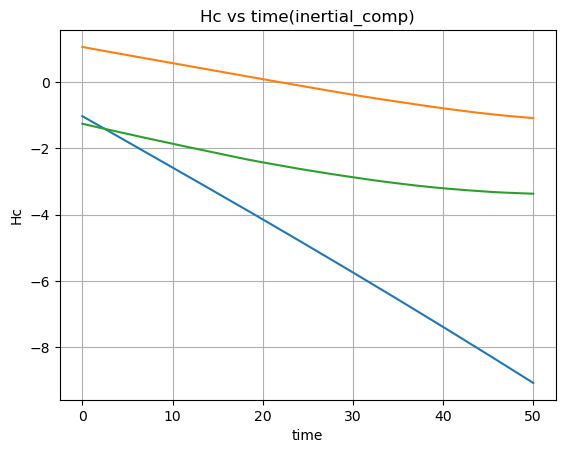

In [74]:
x=[]

for i in range(int(t_final/h)):
    H_inertial=np.linalg.inv(dcm_from_mrp(sigma[i])) @ H[i]
    x.append(H_inertial)
    
HX=np.array(x)[:,0].flatten()
HY=np.array(x)[:,1].flatten()
HZ=np.array(x)[:,2].flatten()

plt.figure()
plt.plot(time[:-1] ,HX)
plt.plot(time[:-1] ,HY)
plt.plot(time[:-1] ,HZ)
plt.xlabel("time")
plt.ylabel("Hc")
plt.title("Hc vs time(inertial_comp)")
plt.grid()
plt.show()

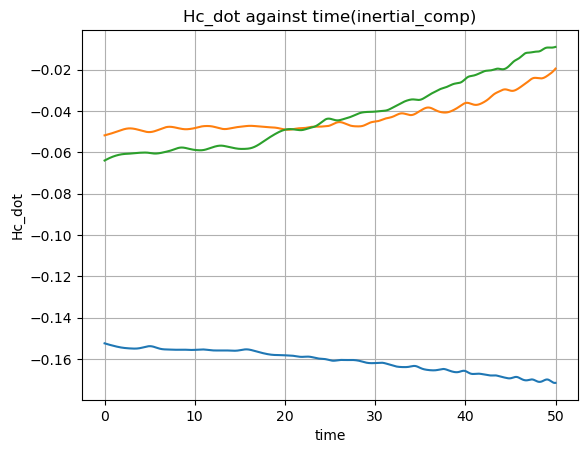

In [75]:
Hc_dot_X=(HX[1:]-HX[:-1])/h
Hc_dot_Y=(HY[1:]-HY[:-1])/h
Hc_dot_Z=(HZ[1:]-HZ[:-1])/h

plt.figure()
plt.plot(time[:-2] ,Hc_dot_X)
plt.plot(time[:-2] ,Hc_dot_Y)
plt.plot(time[:-2] ,Hc_dot_Z)
plt.xlabel("time")
plt.ylabel("Hc_dot")
plt.title("Hc_dot against time(inertial_comp)")
plt.grid()
plt.show()

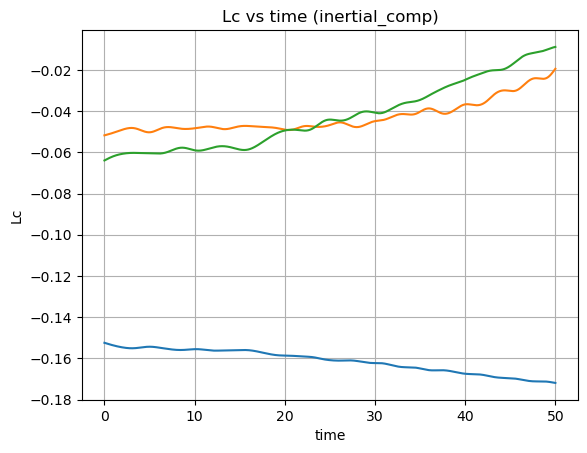

In [76]:
y=[]
for i in range(int(t_final/h)):
    L_inertial=np.linalg.inv(dcm_from_mrp(sigma[i])) @ Lc
    y.append(L_inertial)

LX=np.array(y)[:,0].flatten()
LY=np.array(y)[:,1].flatten()
LZ=np.array(y)[:,2].flatten()

plt.figure()
plt.plot(time[:-1] ,LX)
plt.plot(time[:-1] ,LY)
plt.plot(time[:-1] ,LZ)
plt.xlabel("time")
plt.ylabel("Lc")
plt.title("Lc vs time (inertial_comp)")
plt.grid()
plt.show()

In [77]:
# Since Lc is non-zero, the H will vary 
# So, inertial components of Hc_dot should match with inertial components Of Lc
# check 1: ok


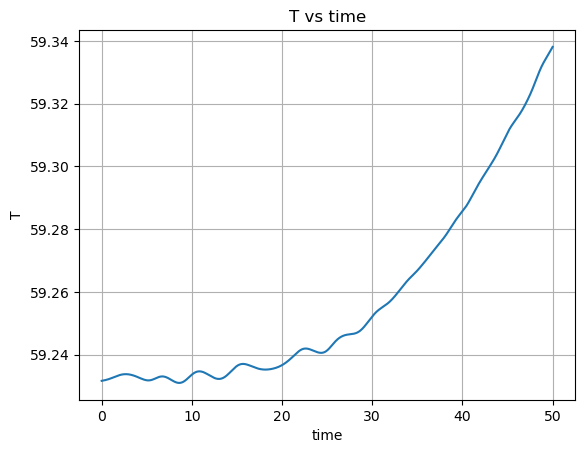

In [78]:
plt.figure()
plt.plot(time ,T)
plt.xlabel("time")
plt.ylabel("T")
plt.title("T vs time")
plt.grid()
plt.show()

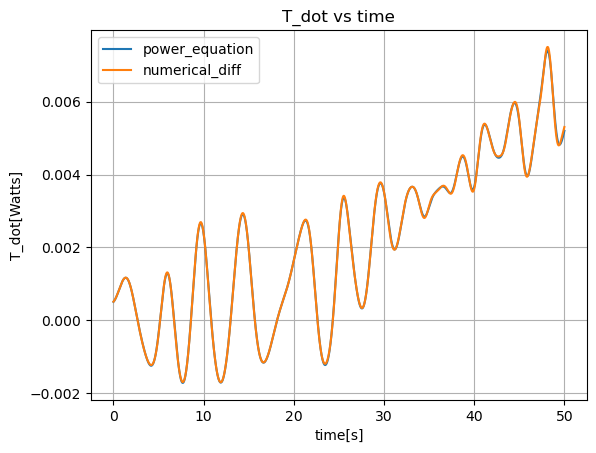

In [79]:
plt.figure()
plt.plot(time ,T_dot, label='power_equation')
plt.plot(time[:-1] ,(np.array(T[1:])-np.array(T[:-1]))/h, label='numerical_diff')
plt.legend()
plt.xlabel('time[s]')
plt.ylabel('T_dot[Watts]')
plt.title('T_dot vs time')
plt.grid(True)
plt.show()

In [80]:
# check 2:ok 